## Implement Quasiparticle Hamiltonian on a IonQ simulator

In [1]:
import qiskit
import numpy as np
from qiskit.quantum_info import SparsePauliOp

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from typing import Dict


Load matrix elements for $^{18}O$

In [2]:
data_onebody=np.load('data/matrix_elements_h_eff_2body/one_body_nn_sd.npz')
keys=data_onebody['keys']
values=data_onebody['values']

t_onebody={}

for a,key in enumerate(keys):
    t_onebody[tuple(key)]=values[a]

print(t_onebody)


{(0, 0): -9.3151, (0, 1): 0.6897999999999996, (0, 2): -0.4062999999999996, (0, 3): -0.900781889989654, (0, 4): -1.9314456782406446, (0, 5): 0.6017349640876247, (1, 0): 0.6897999999999996, (1, 1): -8.8615, (1, 2): 0.8598999999999998, (1, 3): 0.900781889989654, (1, 4): 1.1336192497488327, (1, 5): -1.3995613925794368, (2, 0): -0.4062999999999996, (2, 1): 0.8598999999999998, (2, 2): -9.145, (2, 3): -0.900781889989654, (2, 4): -0.7347060355029268, (2, 5): 1.7984746068253425, (3, 0): -0.900781889989654, (3, 1): 0.900781889989654, (3, 2): -0.900781889989654, (3, 3): -8.107099999999999, (3, 4): -0.7177133829043456, (3, 5): 0.7177133829043456, (4, 0): -1.9314456782406446, (4, 1): 1.1336192497488327, (4, 2): -0.7347060355029268, (4, 3): -0.7177133829043456, (4, 4): 3.2251000000000003, (4, 5): 0.9008999999999998, (5, 0): 0.6017349640876247, (5, 1): -1.3995613925794368, (5, 2): 1.7984746068253425, (5, 3): 0.7177133829043456, (5, 4): 0.9008999999999998, (5, 5): 3.2251000000000003}


#### Build-up $H_Q$

In [149]:
def get_hamiltonian(t_onebody:Dict, n_sites:int):

    # List of Hamiltonian terms as 3-tuples containing
    # (1) the Pauli string,
    # (2) the qubit indices corresponding to the Pauli string,
    # (3) the coefficient.
    XX_tuples=[]
    YY_tuples=[]
    Z_tuples=[]
    I_tuples=[]
    for (i,j),t_val in t_onebody.items():
    
        if i==j:
            Z_tuples.append(("Z", [i], 0.5*t_val))
            I_tuples.append(('I',[i],0.5*t_val)) 
        else:
            XX_tuples.append( ("XX", [i, j], 0.25*t_val) )
            YY_tuples.append(("YY", [i, j], 0.25*t_val) )
            
    # We create the Hamiltonian as a SparsePauliOp, via the method
    # `from_sparse_list`, and multiply by the interaction term.
    hamiltonian = SparsePauliOp.from_sparse_list([*XX_tuples, *YY_tuples,*Z_tuples,*I_tuples], num_qubits=n_sites)
    return hamiltonian.simplify()



Get the manybody basis

In [150]:
import numpy as np
from qiskit.quantum_info import Statevector

n_sites=6
basis_states = [Statevector.from_label(np.binary_repr(i, width=n_sites)) for i in range(2**n_sites)]

bitstring_to_index = {np.binary_repr(i, width=n_sites): i for i in range(2**n_sites)}
index_to_bitstring = {i: np.binary_repr(i, width=n_sites) for i in range(2**n_sites)}

In [151]:
print(index_to_bitstring)

{0: '000000', 1: '000001', 2: '000010', 3: '000011', 4: '000100', 5: '000101', 6: '000110', 7: '000111', 8: '001000', 9: '001001', 10: '001010', 11: '001011', 12: '001100', 13: '001101', 14: '001110', 15: '001111', 16: '010000', 17: '010001', 18: '010010', 19: '010011', 20: '010100', 21: '010101', 22: '010110', 23: '010111', 24: '011000', 25: '011001', 26: '011010', 27: '011011', 28: '011100', 29: '011101', 30: '011110', 31: '011111', 32: '100000', 33: '100001', 34: '100010', 35: '100011', 36: '100100', 37: '100101', 38: '100110', 39: '100111', 40: '101000', 41: '101001', 42: '101010', 43: '101011', 44: '101100', 45: '101101', 46: '101110', 47: '101111', 48: '110000', 49: '110001', 50: '110010', 51: '110011', 52: '110100', 53: '110101', 54: '110110', 55: '110111', 56: '111000', 57: '111001', 58: '111010', 59: '111011', 60: '111100', 61: '111101', 62: '111110', 63: '111111'}


In [156]:
hamiltonian_q=get_hamiltonian(t_onebody=t_onebody,n_sites=6)

print(hamiltonian_q[0],hamiltonian_q[15])

print(hamiltonian_q.to_matrix(sparse=True))

index=1
effective_index=63-2**index

print(hamiltonian_q.to_matrix(sparse=True)[effective_index,effective_index])


SparsePauliOp(['IIIIXX'],
              coeffs=[0.3449+0.j]) SparsePauliOp(['IIIIYY'],
              coeffs=[0.3449+0.j])
  (0, 0)	(-28.978499999999997+0j)
  (0, 3)	0j
  (0, 5)	0j
  (0, 6)	0j
  (0, 9)	0j
  (0, 10)	0j
  (0, 12)	0j
  (0, 17)	0j
  (0, 18)	0j
  (0, 20)	0j
  (0, 24)	0j
  (0, 33)	0j
  (0, 34)	0j
  (0, 36)	0j
  (0, 40)	0j
  (0, 48)	0j
  (1, 1)	(-19.663399999999996+0j)
  (1, 2)	(0.6897999999999996+0j)
  (1, 4)	(-0.4062999999999996+0j)
  (1, 7)	0j
  (1, 8)	(-0.900781889989654+0j)
  (1, 11)	0j
  (1, 13)	0j
  (1, 16)	(-1.9314456782406446+0j)
  (1, 19)	0j
  :	:
  (62, 44)	0j
  (62, 47)	(-1.9314456782406446+0j)
  (62, 50)	0j
  (62, 52)	0j
  (62, 55)	(-0.900781889989654+0j)
  (62, 56)	0j
  (62, 59)	(-0.4062999999999996+0j)
  (62, 61)	(0.6897999999999996+0j)
  (62, 62)	(-9.315100000000003+0j)
  (63, 15)	0j
  (63, 23)	0j
  (63, 27)	0j
  (63, 29)	0j
  (63, 30)	0j
  (63, 39)	0j
  (63, 43)	0j
  (63, 45)	0j
  (63, 46)	0j
  (63, 51)	0j
  (63, 53)	0j
  (63, 54)	0j
  (63, 57)	0j
  (63, 58)	0

#### Qiskit has the sick problem that the occupation value 1 becomes 0 (they define $S_z$ in the opposite way). Therefore, to select the Hamiltonian fixed in the one quasiparticle many-body basis we need to consider the conversion to the full bitstrig basis 

bitstring_index= 63- $2^{sp \; index}$

In [157]:
hamiltonian_q_single_particle={}

for a in range(n_sites):
    for b in range(n_sites):
        a_mb=63-2**a
        b_mb=63-2**b
        hamiltonian_q_single_particle[(a,b)]=hamiltonian_q.to_matrix(sparse=True)[a_mb,b_mb]

In [158]:
print(hamiltonian_q_single_particle[0,0])

(-9.315100000000003+0j)


#### Build-up the driver Hamiltonian

In [159]:
coupling_term=-9.3151
Z_tuples=[("Z", [0], 0.5*coupling_term)]
I_tuples=[('I',[0],0.5*coupling_term)]

        
# We create the Hamiltonian as a SparsePauliOp, via the method
# `from_sparse_list`, and multiply by the interaction term.
hamiltonian_driver = SparsePauliOp.from_sparse_list([*Z_tuples,*I_tuples], num_qubits=n_sites)


print(hamiltonian_driver)

SparsePauliOp(['IIIIIZ', 'IIIIII'],
              coeffs=[-4.65755+0.j, -4.65755+0.j])


In [160]:
hamiltonian_driver_single_particle={}

for a in range(n_sites):
    for b in range(n_sites):
        a_mb=63-2**a
        b_mb=63-2**b
        hamiltonian_driver_single_particle[(a,b)]=hamiltonian_driver.to_matrix(sparse=True)[a_mb,b_mb]

In [161]:
print(hamiltonian_driver_single_particle)

{(0, 0): (-9.3151+0j), (0, 1): 0j, (0, 2): 0j, (0, 3): 0j, (0, 4): 0j, (0, 5): 0j, (1, 0): 0j, (1, 1): 0j, (1, 2): 0j, (1, 3): 0j, (1, 4): 0j, (1, 5): 0j, (2, 0): 0j, (2, 1): 0j, (2, 2): 0j, (2, 3): 0j, (2, 4): 0j, (2, 5): 0j, (3, 0): 0j, (3, 1): 0j, (3, 2): 0j, (3, 3): 0j, (3, 4): 0j, (3, 5): 0j, (4, 0): 0j, (4, 1): 0j, (4, 2): 0j, (4, 3): 0j, (4, 4): 0j, (4, 5): 0j, (5, 0): 0j, (5, 1): 0j, (5, 2): 0j, (5, 3): 0j, (5, 4): 0j, (5, 5): 0j}


#### Define the Parameter Hamiltonian $H(s)=s H_Q + (1-s) H_D$

In [ ]:
from qiskit.circuit import Parameter

s = Parameter("s")

hamiltonian_s = s * hamiltonian_q + (1 - s) * hamiltonian_driver



In [163]:
dt=0.5
hamiltonian_eval = hamiltonian_s.assign_parameters({s: dt})


In [173]:
from qiskit.quantum_info import  commutator


# Define the total particle number operator N
z_op = [("Z", [i], 0.5) for i in range(n_sites)]
identity=[("I", [i], 0.5) for i in range(n_sites)]
n_operator=SparsePauliOp.from_sparse_list([*z_op,], num_qubits=n_sites)

# Compute the commutator [H, N]
commutator_result = commutator(hamiltonian_eval, n_operator).simplify()

print(commutator_result)

SparsePauliOp(['IIIIII'],
              coeffs=[0j])


#### Let's perform the SUZUKI-TROTTER

In [182]:
from qiskit.synthesis import SuzukiTrotter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import transpile
from qiskit.quantum_info import Statevector
second_order_formula = SuzukiTrotter(order=1)  # if not passed, order defaults to 2
trotter_step_second_order = PauliEvolutionGate(hamiltonian_eval, dt, synthesis=second_order_formula)
circuit = QuantumCircuit(hamiltonian_eval.num_qubits)
circuit.append(trotter_step_second_order, range(hamiltonian_eval.num_qubits))
circuit = circuit.decompose(reps=2)
circuit_opt=circuit
#circuit_opt = transpile(circuit, optimization_level=1)

#final_state=Statevector(circuit_opt)

initial_state=QuantumCircuit(hamiltonian_eval.num_qubits)
initial_state.x([1,2,3,4,5])

initial_state.append(circuit_opt,circuit_opt.qubits)
final_state=Statevector(initial_state)

In [179]:

print(
    f"""
Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: {circuit.depth()}
             Gate count: {len(circuit)}
    Nonlocal gate count: {circuit.num_nonlocal_gates()}
         Gate breakdown: {", ".join([f"{k.upper()}: {v}" for k, v in circuit.count_ops().items()])}

"""
)

print(
    f"""
Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: {circuit_opt.depth()}
             Gate count: {len(circuit_opt)}
    Nonlocal gate count: {circuit_opt.num_nonlocal_gates()}
         Gate breakdown: {", ".join([f"{k.upper()}: {v}" for k, v in circuit_opt.count_ops().items()])}

"""
)


# And finall
%matplotlib inline
initial_state.draw("text")


Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: 76
             Gate count: 216
    Nonlocal gate count: 60
         Gate breakdown: H: 60, CX: 60, RX: 60, RZ: 30, U1: 6



Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: 48
             Gate count: 108
    Nonlocal gate count: 60
         Gate breakdown: CX: 60, RZ: 30, U2: 12, H: 6




┌──────────────┐
q_0: ─────┤0             ├
     ┌───┐│              │
q_1: ┤ X ├┤1             ├
     ├───┤│              │
q_2: ┤ X ├┤2             ├
     ├───┤│  circuit-903 │
q_3: ┤ X ├┤3             ├
     ├───┤│              │
q_4: ┤ X ├┤4             ├
     ├───┤│              │
q_5: ┤ X ├┤5             ├
     └───┘└──────────────┘

/opt/anaconda3/envs/qs-estimation_env/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


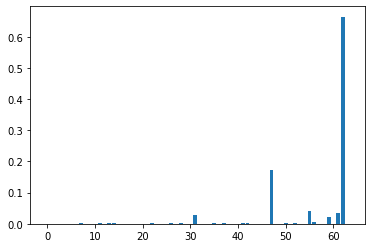

/tmp/ipykernel_2567184/3323700427.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  single_particle_vector[a]=final_state.data[a_mb]


In [183]:
import matplotlib.pyplot as plt



prob=np.conjugate(final_state.data)*final_state.data

plt.bar(np.arange(prob.shape[0]),prob)
plt.show()

# convert into the single particle state
single_particle_vector=np.zeros(n_sites)

for a in range(n_sites):
    a_mb=63-2**a
    single_particle_vector[a]=final_state.data[a_mb]

In [184]:
print(np.linalg.norm(single_particle_vector))
print(np.linalg.norm(final_state.data))

0.6209957216076832
0.9999999999999937


#### Writing down the Hamiltonian using RXX, RYY and RZ

In [84]:
def exp_hamiltonian_q(qc,t_onebody,time,n_sites):
    for a in range(n_sites):
        for b in range(a,n_sites):
            if a!=b:
                value=-time*t_onebody[a,b]
                qc.rxx(value,a,b)
                
            if a==b:
                value=-time*t_onebody[a,b]
                qc.p(value,a)
    for a in range(n_sites):
        for b in range(a,n_sites):
            if a!=b:
                value=-time*t_onebody[a,b]
                qc.ryy(value,a,b)
                

def exp_hamiltonian_driving(qc,coupling_term,index,time,n_sites):
    value=-time*coupling_term
    qc.p(value,index)





In [85]:
from qiskit import QuantumCircuit

# Create a 6-qubit quantum circuit
qc = QuantumCircuit(6)

# Apply an X-gate to the first qubit to set it to |1⟩
qc.x([1,2,3,4,5])

# At this point, the state is [1, 0, 0, 0, 0, 0] (i.e., |100000⟩) the initial state of the QA protocol

# Optionally, you can print the circuit
print(qc.draw())

tf=0.5
time=np.linspace(0,tf,2)

for t in time:
    
    exp_hamiltonian_driving(qc,coupling_term=coupling_term,index=0,time=1-t/tf,n_sites=n_sites)
    exp_hamiltonian_q(qc,t_onebody=t_onebody,time=t/tf,n_sites=n_sites)
#qc=qc.decompose(reps=2)    
qc_opt=transpile(qc, optimization_level=3)
    

          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     ├───┤
q_5: ┤ X ├
     └───┘


In [86]:
qc.draw('text')

┌───────────┐┌──────┐┌─────────┐┌─────────┐        ┌─────────┐           »
q_0: ┤ P(9.3151) ├┤ P(0) ├┤0        ├┤0        ├────────┤0        ├───────────»
     └───┬───┬───┘└──────┘│  Rxx(0) ││         │┌──────┐│         │┌─────────┐»
q_1: ────┤ X ├────────────┤1        ├┤  Rxx(0) ├┤ P(0) ├┤         ├┤0        ├»
         ├───┤            └─────────┘│         │└──────┘│  Rxx(0) ││  Rxx(0) │»
q_2: ────┤ X ├───────────────────────┤1        ├────────┤         ├┤1        ├»
         ├───┤                       └─────────┘        │         │└─────────┘»
q_3: ────┤ X ├──────────────────────────────────────────┤1        ├───────────»
         ├───┤                                          └─────────┘           »
q_4: ────┤ X ├────────────────────────────────────────────────────────────────»
         ├───┤                                                                »
q_5: ────┤ X ├────────────────────────────────────────────────────────────────»
         └───┘                                                                »
«     ┌─────────┐                   ┌─────────┐                      »
«q_0: ┤0        ├───────────────────┤0        ├──────────────────────»
«     │         │┌─────────┐        │         │┌─────────┐           »
«q_1: ┤         ├┤0        ├────────┤         ├┤0        ├───────────»
«     │         ││         │┌──────┐│         ││         │┌─────────┐»
«q_2: ┤  Rxx(0) ├┤  Rxx(0) ├┤ P(0) ├┤         ├┤         ├┤0        ├»
«     │         ││         │└──────┘│  Rxx(0) ││  Rxx(0) ││  Rxx(0) │»
«q_3: ┤         ├┤1        ├────────┤         ├┤         ├┤1        ├»
«     │         │└─────────┘        │         ││         │└─────────┘»
«q_4: ┤1        ├───────────────────┤         ├┤1        ├───────────»
«     └─────────┘                   │         │└─────────┘           »
«q_5: ──────────────────────────────┤1        ├──────────────────────»
«                                   └─────────┘                      »
«                ┌─────────┐                   ┌─────────┐           »
«q_0: ───────────┤0        ├───────────────────┤0        ├───────────»
«     ┌─────────┐│  Ryy(0) │                   │         │┌─────────┐»
«q_1: ┤0        ├┤1        ├───────────────────┤  Ryy(0) ├┤0        ├»
«     │         │├─────────┤        ┌─────────┐│         ││  Ryy(0) │»
«q_2: ┤         ├┤0        ├────────┤0        ├┤1        ├┤1        ├»
«     │         ││         │┌──────┐│         │├─────────┤├─────────┤»
«q_3: ┤  Rxx(0) ├┤  Rxx(0) ├┤ P(0) ├┤         ├┤0        ├┤0        ├»
«     │         ││         │└──────┘│  Rxx(0) ││  Rxx(0) ││         │»
«q_4: ┤         ├┤1        ├────────┤         ├┤1        ├┤  Rxx(0) ├»
«     │         │└─────────┘        │         │└─────────┘│         │»
«q_5: ┤1        ├───────────────────┤1        ├───────────┤1        ├»
«     └─────────┘                   └─────────┘           └─────────┘»
«     ┌─────────┐           ┌─────────┐┌─────────┐  ┌──────┐ ┌───────────┐»
«q_0: ┤0        ├───────────┤0        ├┤0        ├──┤ P(0) ├─┤ P(9.3151) ├»
«     │         │┌─────────┐│         ││         │┌─┴──────┴┐└───────────┘»
«q_1: ┤         ├┤0        ├┤         ├┤         ├┤0        ├─────────────»
«     │  Ryy(0) ││         ││         ││         ││         │ ┌─────────┐ »
«q_2: ┤         ├┤  Ryy(0) ├┤  Ryy(0) ├┤         ├┤         ├─┤0        ├─»
«     │         ││         ││         ││  Ryy(0) ││  Ryy(0) │ │  Ryy(0) │ »
«q_3: ┤1        ├┤1        ├┤         ├┤         ├┤         ├─┤1        ├─»
«     └─┬──────┬┘├─────────┤│         ││         ││         │ └─────────┘ »
«q_4: ──┤ P(0) ├─┤0        ├┤1        ├┤         ├┤1        ├─────────────»
«       └──────┘ │  Rxx(0) │└─┬──────┬┘│         │└─────────┘             »
«q_5: ───────────┤1        ├──┤ P(0) ├─┤1        ├────────────────────────»
«                └─────────┘  └──────┘ └─────────┘                        »
«                ┌───────────────┐             ┌──────────────┐»
«q_0: ───────────┤0              ├─────────────┤0             ├»
«

In [87]:
qc.draw()
print(
    f"""
                  Depth: {qc.depth()}
             Gate count: {len(qc)}
    Nonlocal gate count: {qc.num_nonlocal_gates()}
         Gate breakdown: {", ".join([f"{k.upper()}: {v}" for k, v in qc.count_ops().items()])}

"""
)


                  Depth: 30
             Gate count: 79
    Nonlocal gate count: 60
         Gate breakdown: RXX: 30, RYY: 30, P: 14, X: 5




In [88]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np
shots=1000
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(qc)
results_statevector = job_statevector.result()#.get_counts(0)

final_state=Statevector(qc)

/opt/anaconda3/envs/qs-estimation_env/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


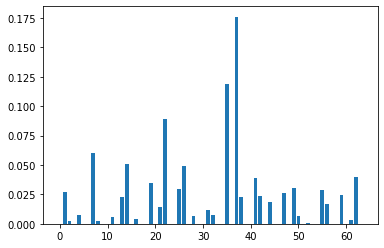

/tmp/ipykernel_2567184/1549167634.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  single_particle_vector[a]=final_state.data[a_mb]


In [89]:
import matplotlib.pyplot as plt
prob=np.conjugate(final_state.data)*final_state.data

plt.bar(np.arange(prob.shape[0]),prob)
plt.show()

# convert into the single particle state
single_particle_vector=np.zeros(n_sites)

for a in range(n_sites):
    a_mb=63-2**a
    single_particle_vector[a]=final_state.data[a_mb]



In [90]:
print(np.linalg.norm(single_particle_vector))
print(np.linalg.norm(final_state.data))

0.19284522204720786
1.0
